# Data Cleaning Process

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

%matplotlib inline
import tools.helpers as th
import tools.data_preparation as dp
import tools.data_visualization as dv

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [2]:
# LOAD DATA WITH INITIAL CLEAN
df = pd.read_csv('data/kc_house_data.csv')
final_df = dp.initial_clean(df)

In [3]:
new_names = {
    'price': 'l_price',
    'date': 'recently_sold', # Binarized
    'bedrooms': 'high_bed', # Binarized
    'bathrooms': 'high_bath', # Binarized
    'sqft_living': 'l_sqft_living',
    'sqft_lot': 'l_sqft_lot',
    'floors': 'single_floor', # Binarized
    'view': 'been_viewed', # Binarized
    'condition': 'good_condition', # Binarized
    'grade': 'high_grade', # Binarized
    'sqft_above': 'l_sqft_above',
    'sqft_basement': 'has_basement',
    'yr_built': 'age_at_sale',
    'yr_renovated': 'recently_renovated', # Binarized
    'sqft_living15': 'l_sqft_living15',
    'sqft_lot15': 'l_sqft_lot15'
    
}

In [4]:
# 'date' column to 'year_sold'
final_df['date'] = final_df['date'].map(lambda x: x.year)

# 'yr_built' to 'age_at_sale'
final_df['yr_built'] = final_df['date'] - final_df['yr_built']

# add 'recently_sold' column
final_df['date'] = np.where(final_df['date'] == 2014, 0, 1)

# 'bedrooms' to 'high_bed', since 3 is most common value
final_df['bedrooms'] = np.where(final_df['bedrooms'] < 3, 0, 1)

# 'bathrooms' to 'high_bath', since 2.5 is most common value
final_df['bathrooms'] = np.where(final_df['bathrooms'] < 2.5, 0, 1)

# 'floors' to 'single_floor', since 1 is most common value
final_df['floors'] = np.where(final_df['floors'] == 1, 0, 1)

# 'view' to 'been_viewed'
final_df['view'] = np.where(final_df['view'] == 0, 0, 1)

# 'condition' to 'good_condition'
final_df['condition'] = np.where(final_df['condition'] < 3, 0, 1)
# MINMAX ??

# 'grade' to 'high_grade'
final_df['grade'] = np.where(final_df['grade'] < 7, 0, 1)

# 'sqft_basement' to 'has_basement'
final_df['sqft_basement'] = np.where(final_df['sqft_basement'] == 0, 0, 1)

# 'yr_renovated' to 'recently_renovated', ie renovated after 2000
final_df['yr_renovated'] = np.where(final_df['yr_renovated'] < 2000, 0, 1)

# LOG TRANSFORM and STANDARDIZE
cols = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']
th.log_transform(final_df, cols)
th.normalize(final_df, cols)

final_df.rename(columns=new_names, inplace=True)

In [5]:
# final_df.hist(figsize=(17, 17), bins='auto');

In [6]:
final_df.describe()

,recently_sold,l_price,high_bed,high_bath,l_sqft_living,l_sqft_lot,single_floor,waterfront,been_viewed,good_condition,high_grade,l_sqft_above,has_basement,age_at_sale,recently_renovated,zipcode,lat,long,l_sqft_living15,l_sqft_lot15
count,21597.000000,2.159700e+04,21597.000000,21597.000000,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.00000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04,2.159700e+04
mean,0.322962,1.342323e-15,0.863129,0.425615,-1.516035e-15,-8.843538e-16,0.505811,0.006760,0.097791,0.990786,0.893133,9.106738e-16,0.38510,43.323286,0.017549,98077.951845,47.560093,-122.213982,-2.618845e-15,-1.789764e-16
std,0.467619,1.000023e+00,0.343719,0.494447,1.000023e+00,1.000023e+00,0.499978,0.081944,0.297039,0.095550,0.308951,1.000023e+00,0.48663,29.377285,0.131307,53.513072,0.138552,0.140724,1.000023e+00,1.000023e+00
min,0.000000,-3.387659e+00,0.000000,0.000000,-3.859712e+00,-3.033041e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-3.468834e+00,0.00000,-1.000000,0.000000,98001.000000,47.155900,-122.519000,-4.735034e+00,-3.054723e+00
25%,0.000000,-6.949183e-01,1.000000,0.000000,-6.725680e-01,-5.150931e-01,0.000000,0.000000,0.000000,1.000000,1.000000,-7.338258e-01,0.00000,18.000000,0.000000,98033.000000,47.471100,-122.328000,-7.114236e-01,-5.214935e-01
50%,0.000000,-5.926981e-02,1.000000,0.000000,9.755471e-03,-5.713116e-02,1.000000,0.000000,0.000000,1.000000,1.000000,-9.998551e-02,0.00000,40.000000,0.000000,98065.000000,47.571800,-122.231000,-6.710155e-02,-2.735255e-02
75%,1.000000,6.244407e-01,1.000000,1.000000,6.910448e-01,3.179305e-01,1.000000,0.000000,0.000000,1.000000,1.000000,7.154718e-01,1.00000,63.000000,0.000000,98118.000000,47.678000,-122.125000,6.929801e-01,3.173147e-01
max,1.000000,5.333889e+00,1.000000,1.000000,4.626992e+00,5.905729e+00,1.000000,1.000000,1.000000,1.000000,1.000000,4.107364e+00,1.00000,115.000000,1.000000,98199.000000,47.777600,-121.315000,3.647541e+00,5.804707e+00


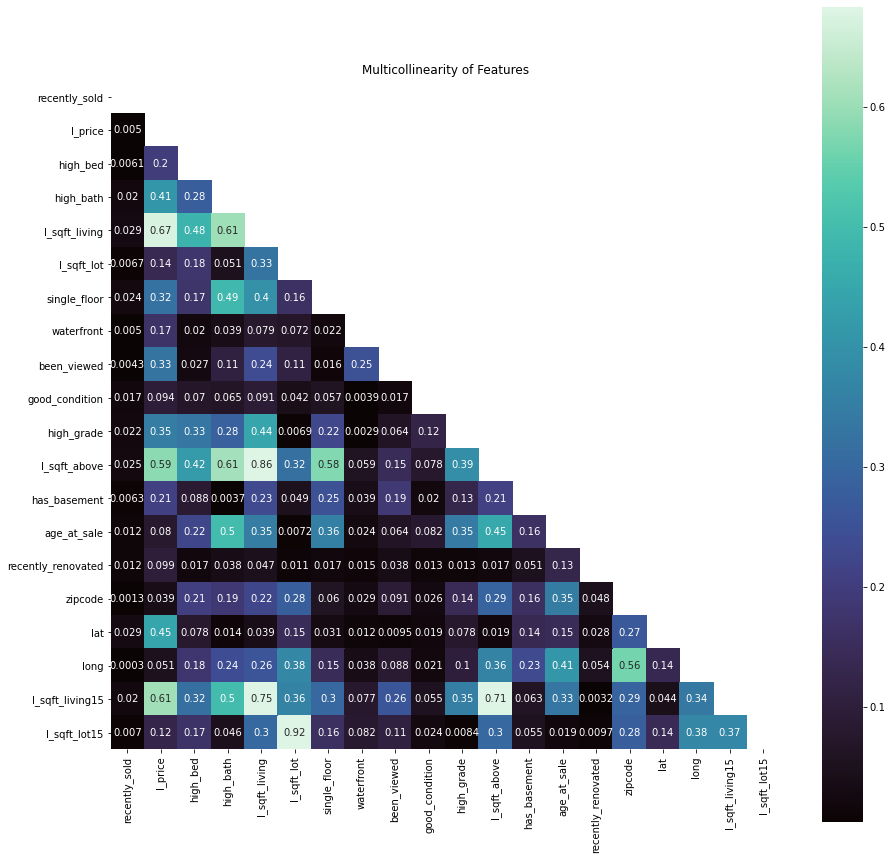

In [7]:
dv.corr_heatmap(final_df)

In [8]:
def predictor_corrs(X):
    """Calculates pairs in X with highest pairwise correlations to determine multicollinearity"""
    corrs = X.corr().abs().stack().reset_index().sort_values(0, ascending=False)
    corrs['pairs'] = list(zip(corrs.level_0, corrs.level_1))
    corrs.drop(['level_0', 'level_1'], axis=1, inplace=True)
    corrs.set_index('pairs', inplace=True)
    corrs.drop_duplicates(inplace=True)

    corrs.columns = ['cc']

    high_cc = corrs[(corrs.cc > .60) & (corrs.cc < 1)]
    return high_cc

In [9]:
drop_cols = ['l_price',
             'l_sqft_living15',
             'l_sqft_lot15',
             'l_sqft_lot',
             'l_sqft_above',
             'high_bath',
            ]

In [10]:
X = final_df.drop(drop_cols, axis=1)
y = final_df['l_price']

predictor_corrs(X)

,cc
pairs,


In [11]:
X.corrwith(y).sort_values(ascending=False)

l_sqft_living         0.674802
lat                   0.448837
high_grade            0.349526
been_viewed           0.329030
single_floor          0.323580
has_basement          0.209097
high_bed              0.199822
waterfront            0.170720
recently_renovated    0.098864
good_condition        0.093919
long                  0.050862
recently_sold         0.004972
zipcode              -0.038788
age_at_sale          -0.080499
dtype: float64

In [11]:
#MULTIPLE LINEAR REGRESSION (ALL)

formula='l_price~' + '+'.join(X.columns)
model = smf.ols(formula, sm.add_constant(final_df)).fit()
model.summary()

NameError: name 'X' is not defined

In [ ]:
#MULTIPLE LINEAR REGRESSION
subset = 


## Handling Missing Values

#### Exploring incomplete features

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [13]:
# LOG TRANSFORM AND NORMALIZE ALL
log_df = df.copy()['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built']
log_transform(log_df, log_df.columns)
normalize(log_df, log_df.columns)

